In [2]:
#线性回归的python实现方法
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

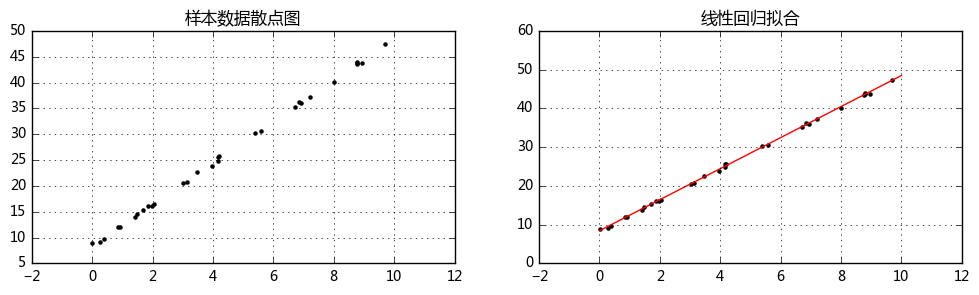

In [4]:
from sklearn.linear_model import LinearRegression

rng = np.random.RandomState(1)  
xtrain = 10 * rng.rand(30)
ytrain = 8 + 4 * xtrain + rng.rand(30)


fig = plt.figure(figsize =(12,3))
ax1 = fig.add_subplot(1,2,1)
plt.scatter(xtrain,ytrain,marker = '.',color = 'k')
plt.grid()
plt.title('样本数据散点图')

model = LinearRegression()
model.fit(xtrain[:,np.newaxis],ytrain)
# LinearRegression → 线性回归评估器，用于拟合数据得到拟合直线
# model.fit(x,y) → 拟合直线，参数分别为x与y
# x[:,np.newaxis] → 将数组变成(n,1)形状

xtest = np.linspace(0,10,1000)
ytest = model.predict(xtest[:,np.newaxis])
# 创建测试数据xtest，并根据拟合曲线求出ytest

ax2 = fig.add_subplot(1,2,2)
plt.scatter(xtrain,ytrain,marker = '.',color = 'k')
plt.plot(xtest,ytest,color = 'r')
plt.grid()
plt.title('线性回归拟合')

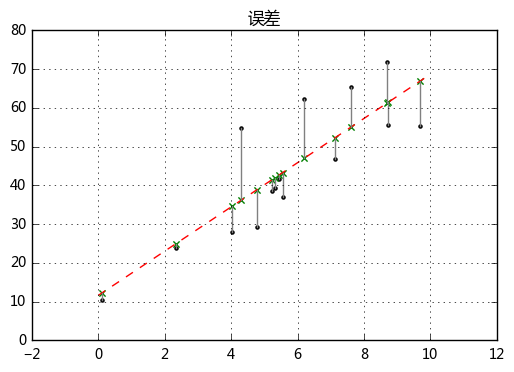

In [5]:
# 简单线性回归（一元线性回归）
# （2）误差

rng = np.random.RandomState(8)
xtrain = 10 * rng.rand(15)
ytrain = 8 + 4 * xtrain + rng.rand(15) * 30
model.fit(xtrain[:,np.newaxis],ytrain)
xtest = np.linspace(0,10,1000)
ytest = model.predict(xtest[:,np.newaxis])
# 创建样本数据并进行拟合

plt.plot(xtest,ytest,color = 'r',linestyle = '--')  # 拟合直线
plt.scatter(xtrain,ytrain,marker = '.',color = 'k')  # 样本数据散点图
ytest2 = model.predict(xtrain[:,np.newaxis])  # 样本数据x在拟合直线上的y值
plt.scatter(xtrain,ytest2,marker = 'x',color = 'g')   # ytest2散点图
plt.plot([xtrain,xtrain],[ytrain,ytest2],color = 'gray')  # 误差线
plt.grid()
plt.title('误差')
# 绘制图表

In [7]:
# 简单线性回归（一元线性回归）
# （3）求解a，b

rng = np.random.RandomState(1)  
xtrain = 10 * rng.rand(30)
ytrain = 8 + 4 * xtrain + rng.rand(30)
# 创建数据

model = LinearRegression()
model.fit(xtrain[:,np.newaxis],ytrain)
# 回归拟合

print('斜率a为：%.4f' % model.coef_[0])
print('截距b为：%.4f' % model.intercept_)
print('线性回归函数为：\ny = %.4fx + %.4f' % (model.coef_[0],model.intercept_))

斜率a为：4.0045
截距b为：8.4477
线性回归函数为：
y = 4.0045x + 8.4477


         b1        b2        b3        b4          y
0  2.219932  8.707323  2.067192  9.186109  60.034105
1  4.884112  6.117439  7.659079  5.184180  24.477270
2  2.968005  1.877212  0.807413  7.384403  47.129990
3  4.413092  1.583099  8.799370  2.740865   2.810948
4  4.142350  2.960799  6.287879  5.798378  24.378742
斜率a为： [ 1.5  2.  -4.   3. ]
截距b为：20.0000
线性回归函数为：
y = 1.5x1 + 2.0x2 + -4.0x3 + 3.0x4 + 20.0


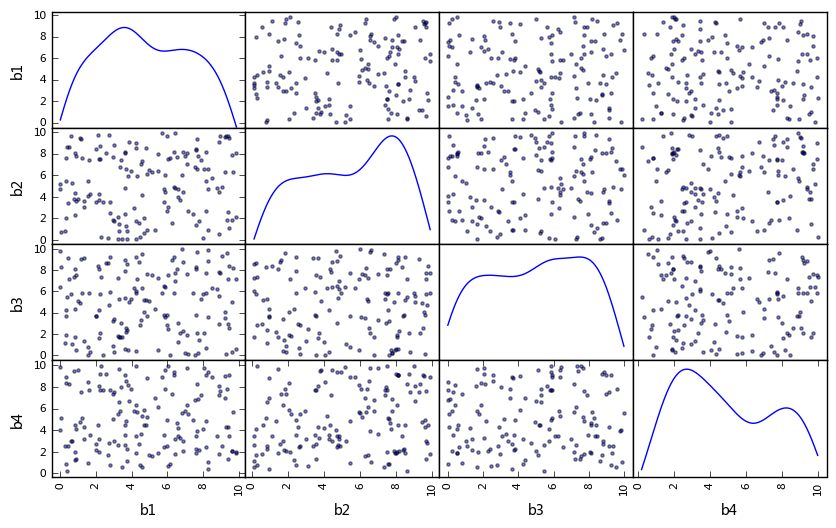

In [8]:
# 多元线性回归

rng = np.random.RandomState(5)  
xtrain = 10 * rng.rand(150,4)
ytrain = 20 + np.dot(xtrain ,[1.5,2,-4,3])
df = pd.DataFrame(xtrain, columns = ['b1','b2','b3','b4'])
df['y'] = ytrain
pd.scatter_matrix(df[['b1','b2','b3','b4']],figsize=(10,6),
                 diagonal='kde',
                 alpha = 0.5,
                 range_padding=0.1)
print(df.head())
# 创建数据，其中包括4个自变量
# 4个变量相互独立

model = LinearRegression()
model.fit(df[['b1','b2','b3','b4']],df['y'])
# 多元回归拟合

print('斜率a为：' ,model.coef_)
print('截距b为：%.4f' % model.intercept_)
print('线性回归函数为：\ny = %.1fx1 + %.1fx2 + %.1fx3 + %.1fx4 + %.1f' 
      % (model.coef_[0],model.coef_[1],model.coef_[2],model.coef_[3],model.intercept_))
# 参数输出

In [9]:
'''
 线性回归模型评估

通过几个参数验证回归模型

SSE(和方差、误差平方和)：The sum of squares due to error
MSE(均方差、方差)：Mean squared error
RMSE(均方根、标准差)：Root mean squared error
R-square(确定系数) Coefficient of determination

'''

'\n 线性回归模型评估\n\n通过几个参数验证回归模型\n\nSSE(和方差、误差平方和)：The sum of squares due to error\nMSE(均方差、方差)：Mean squared error\nRMSE(均方根、标准差)：Root mean squared error\nR-square(确定系数) Coefficient of determination\n\n'

In [11]:
# 模型评价
# MSE, RMES, R-square

from sklearn import metrics

rng = np.random.RandomState(1)  
xtrain = 10 * rng.rand(30)
ytrain = 8 + 4 * xtrain + rng.rand(30) * 3
# 创建数据

model = LinearRegression()
model.fit(xtrain[:,np.newaxis],ytrain)
# 多元回归拟合

ytest = model.predict(xtrain[:,np.newaxis])  # 求出预测数据
mse = metrics.mean_squared_error(ytrain,ytest)  # 求出均方差
rmse = np.sqrt(mse)  # 求出均方根

#ssr = ((ytest - ytrain.mean())**2).sum()  # 求出预测数据与原始数据均值之差的平方和
#sst = ((ytrain - ytrain.mean())**2).sum()  # 求出原始数据和均值之差的平方和
#r2 = ssr / sst # 求出确定系数

r2 = model.score(xtrain[:,np.newaxis],ytrain)  # 求出确定系数
print("均方差MSE为: %.5f" % mse)
print("均方根RMSE为: %.5f" % rmse)
print("确定系数R-square为: %.5f" % r2)
# 确定系数R-square非常接近于1，线性回归模型拟合较好

均方差MSE为: 0.78471
均方根RMSE为: 0.88584
确定系数R-square为: 0.99465
